# Constructing a Model - Telco Customers and their Subscription

#### Load Libraries

In [1]:
# Pandas and numpy
import pandas as pd
import numpy as np

# Additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn as sklearn
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#### Load Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Exploratory Data Analysis

#### Dataset overview

Let's first understand the overall characteristics of the dataset: the shape, the column types, descriptive statistics (if applicable), and if there are missing values.

In [3]:
# Looking at the database shape
df.shape

(7043, 21)

There are 7043 entries and 21 features in this dataset.

In [4]:
# Seeing dtypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Most columns appear to be objects. The object dtype can be useful, but this means that we have to examine the column content to make sure that it is consistent.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There are three columns that are currently in numeric data types: `SeniorCitizen`, `tenure`, and `MonthlyCharges`. However, we will see later that another column is numeric in nature, while one of these columns is not to be treated as a numeric variable.

In [6]:
# Checking for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are 0 null values, however this does not necessarily mean that all values are usable. We will see later if there are values that need cleaning.

#### Univariate analysis

In this section, we will look at each of the columns in the dataframe, get to know their contents, and see if any adjustments have to be made to dataframe content (cleaning, standardisation etc.)

##### `customerID`

In [7]:
# Sample of column entries
df['customerID'].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

We can see that column `customerID` is supposed to be a unique identifier, so there isn't much in terms of visualising distribution, etc. We can do with this column. However, we should check to see if there are any duplicates.

In [8]:
# Checking for duplicates
len(df['customerID']) - len(df['customerID'].drop_duplicates()) 

0

We should also check to see if values in `customerID` are of consistent length, just in case.

In [9]:
df['customerID'].str.len().value_counts()

10    7043
Name: customerID, dtype: int64

##### `gender`

In [10]:
# Sample of column entries
df['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

This appears to be a column with values pertaining to the customer's gender. Let's see the unique values in the column and their distribution by using `value_counts()`.

In [11]:
# Distribution of values
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
# Distribution of values as percentage of all entries
df['gender'].value_counts() / len(df) * 100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

<AxesSubplot:>

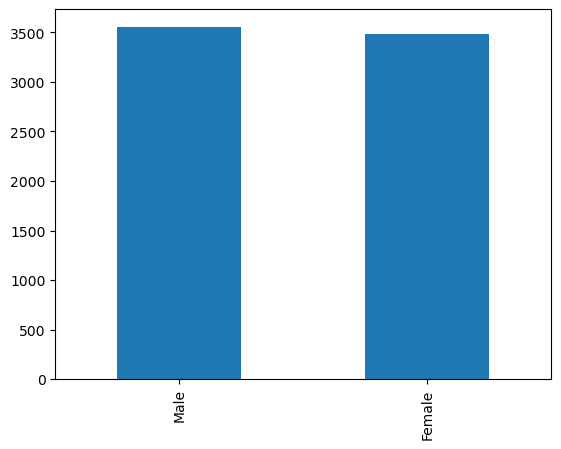

In [13]:
# Plotting the distribution of values
df['gender'].value_counts().plot.bar()

There appears to be a fairly even gender distribution in this dataset.

##### `SeniorCitizen`

In [14]:
# Sample of column entries
df['SeniorCitizen'].tail()

7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, dtype: int64

This appears to be a column with values pertaining to the customer's senior citizen status. **Interestingly, this column has the `int64` datatype, even though the information appears to be categorical/boolean in nature.** Let's see the unique values in the column and their distribution by using `value_counts()`.

In [15]:
# Distribution of values
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [16]:
# Distribution of values as percentage of all entries
df['SeniorCitizen'].value_counts() / len(df) * 100

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

<AxesSubplot:>

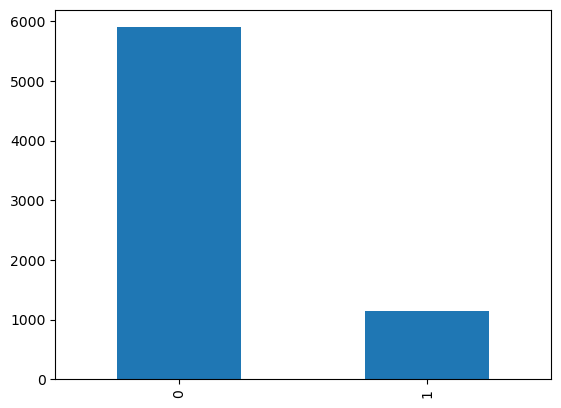

In [17]:
# Plotting the distribution of values
df['SeniorCitizen'].value_counts().plot.bar()

It appears that 16.2% of the respondents are senior citizens, with the remaining not having senior citizen status.

##### `Partner`

In [18]:
# Sample of column entries
df['Partner'].head()

0    Yes
1     No
2     No
3     No
4     No
Name: Partner, dtype: object

This appears to be a column with values recording if the customer has a Partner. **This column's values also appear to indicate if something is true or false, but uses the `object` dtype instead of `int64` like `SeniorCitizen.`** Let's look at the datatype of the first object:

In [19]:
type(df['Partner'].values.item(0))

str

Let's see if this is true for all items. We will define a function `typecheck` that we can use later in this notebook.

In [20]:
def typecheck(data, type_query, error_msg=True):
    """
    A function that checks if all entries in a dataframe column are of a certain type.
    Written because we could not find something in the Pandas documentation that gives me
    value types aside from the column type, which is frustrating if column dtype is 'O.'
    Would love to know if something else exists.

    data - Pandas series, or dataframe column if entered as df['column']
    
    type_query - dtype, as type str

    
    """
    count = 0
    type_ = np.dtype(type_query)
    for i in range(len(data.values)):
        if type(data.values.item(i)) == type_:
            count = count + 1
        else:
            if error_msg == True:
                print('There is an item in position ' + str(i) + ' with value ' + str(data.values.item(i)) + ' and type ' + str(type(data.values.item(i))))
    print(str(count) + ' items are type ' + type_query + ', out of ' + str(len(data)))


In [21]:
# Checking if this is the case for 
typecheck(df['Partner'], 'str')

7043 items are type str, out of 7043


All items are of type `str`. Let's see the unique values in the column and their distribution by using `value_counts()`.

In [22]:
# Distribution of values
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [23]:
# Distribution of values as percentage of all entries
df['Partner'].value_counts() / len(df) * 100

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

<AxesSubplot:>

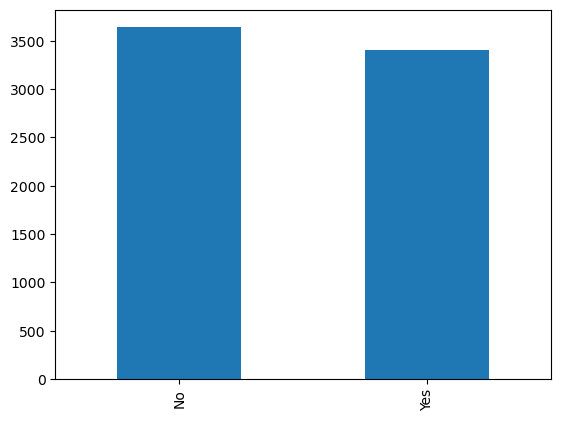

In [24]:
# Plotting the distribution of values
df['Partner'].value_counts().plot.bar()

The customer base is fairly evenly split between customers who have partners and those who do not.

##### `Dependents`

In [25]:
# Sample of column entries
df['Dependents'].head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

This appears to be another Yes/No column pertaining to whether or not customers have Dependents. This likely usually applies to children. We can confirm that all entries are string:

In [26]:
typecheck(df['Dependents'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and distribution:

In [27]:
# Distribution of values
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [28]:
# Distribution of values as percentage of all entries
df['Dependents'].value_counts() / len(df) * 100

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

<AxesSubplot:>

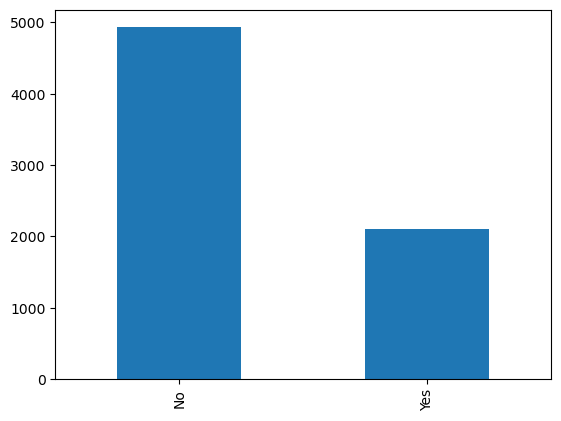

In [29]:
# Plotting the distribution of values
df['Dependents'].value_counts().plot.bar()

It appears that most customers do not have Dependents, with only 30% of customers reporting that they do.

##### `tenure`

In [30]:
# Sample of column entries
df['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

This appears to be our first **numeric** column, with a dtype of `int64`. This probably refers to the number of units of time that customers have been engaged with the telco, which we imagine to be months as customers are usually billed monthly. We know from earlier that there are no misnullsing values in this column, so let's get some descriptive statistics to have an idea of the values' range and variability.

In [31]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

`min` appears to be 0, so let's check how many values are 0 in this dataset:

In [32]:
print('There are ' + str(len(df[df['tenure'] == 0]['tenure'])) + ' rows which have a tenure value at 0, which is ' + str(len(df[df['tenure'] == 0]['tenure']) / len(df) * 100) + '% of all rows.')

There are 11 rows which have a tenure value at 0, which is 0.1561834445548772% of all rows.


**What does it mean for a customer to have a tenure of 0 months?** It is possible these customers have not yet been billed once.

Let's see the distribution of values across the dataset.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

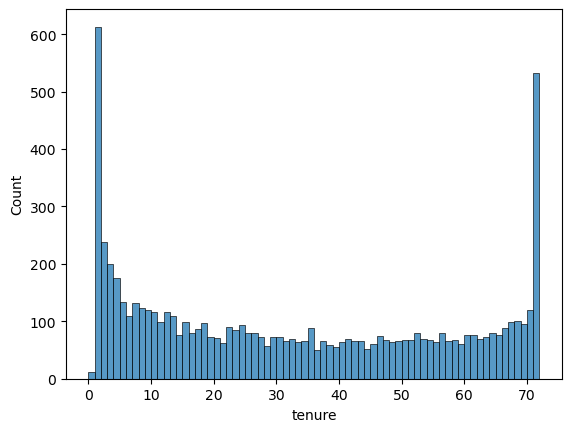

In [33]:
sns.histplot(data=(df['tenure']), binwidth=1)

Let's calculate skewness:

In [34]:
df['tenure'].skew()

0.2395397495619829

The distribution is positively skewed, or skewed to the left.

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [35]:
scipy.stats.kurtosis(df['tenure'])

-1.3872386910324277

Kurtosis is negative, indicating that the distribution is relatively flat.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5697f56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5697f5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5697f5400>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5698fc250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5698fc520>],
 'means': []}

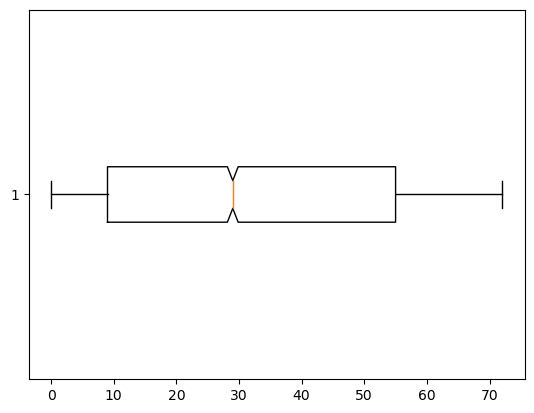

In [36]:
import matplotlib.pyplot

matplotlib.pyplot.boxplot(df['tenure'], notch='True', vert=0)

It appears that the last quartile has a much wider range than the others, but there are no extreme outliers.

##### `PhoneService`

In [37]:
# Sample of column entries
df['PhoneService'].head()

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: PhoneService, dtype: object

This appears to be yet another Yes/No column. We imagine this pertains to whether customers have phone service as part of their plans. With the assumption that this is a Yes/No column, let's skip checking type and look at the unique values and their distribution:

In [38]:
# Distribution of values
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [39]:
# Distribution of values as percentage of all entries
df['PhoneService'].value_counts() / len(df) * 100

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

<AxesSubplot:>

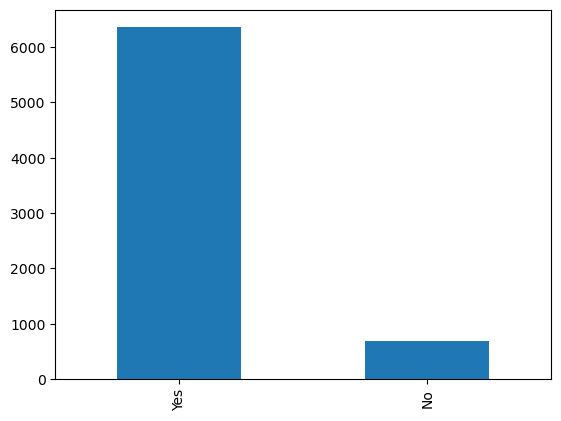

In [40]:
# Plotting the distribution of values
df['PhoneService'].value_counts().plot.bar()

Most customers appear to have phone service.

##### `internet`

In [41]:
# Sample of column entries
df['InternetService'].head()

0            DSL
1            DSL
2            DSL
3            DSL
4    Fiber optic
Name: InternetService, dtype: object

This appears to be a string column with options that are not 'Yes' or 'No.' Let's confirm that all objects in this array are strings:

In [42]:
typecheck(df['InternetService'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and their distribution.

In [43]:
# Distribution of values
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [44]:
# Distribution of values as percentage of all entries
df['InternetService'].value_counts() / len(df) * 100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

<AxesSubplot:>

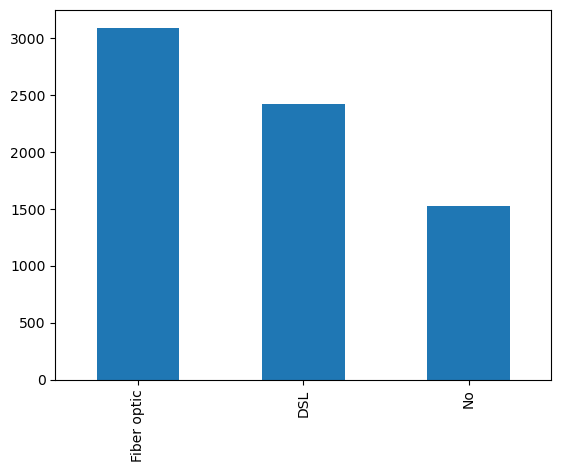

In [45]:
# Plotting the distribution of values
df['InternetService'].value_counts().plot.bar()

21.67% of customers do not have internet service.

In [46]:
df[df['InternetService'] != 'No']['InternetService'].value_counts() / len(df[df['InternetService'] != 'No']['InternetService']) * 100

Fiber optic    56.117455
DSL            43.882545
Name: InternetService, dtype: float64

Among those who have internet service, 56% use fiber optic service, while almost 44% use DSL. 

##### `OnlineSecurity`

In [47]:
# Sample of column entries
df['OnlineSecurity'].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: OnlineSecurity, dtype: object

This appears to be a string column with Yes/No values. However, let's look at the unique values:

In [48]:
# Distribution of values
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Other than No and Yes, there is one last option for this column: 'No internet service.' This indicates that the customer does not have internet service. Let's confirm that this corresponds 1:1 with the column `internet`:

In [49]:
print(len(df[df['InternetService'] == 'No']) - len(df[df['OnlineSecurity'] == 'No internet service']))
print(len(df[df['OnlineSecurity'] == 'No internet service']) - len(df[df['InternetService'] == 'No']))

0
0


In [50]:
(df[df['InternetService'] == 'No'] == df[df['OnlineSecurity'] == 'No internet service']).value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
True        True    True           True     True        True    True          True           True             True            True          True              True         True         True             True      True              True           True            True          True     1526
dtype: int64

They appear to correspond. Let's look at their distribution:

In [51]:
# Distribution of values as percentage of all entries
df['OnlineSecurity'].value_counts() / len(df) * 100

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64

<AxesSubplot:>

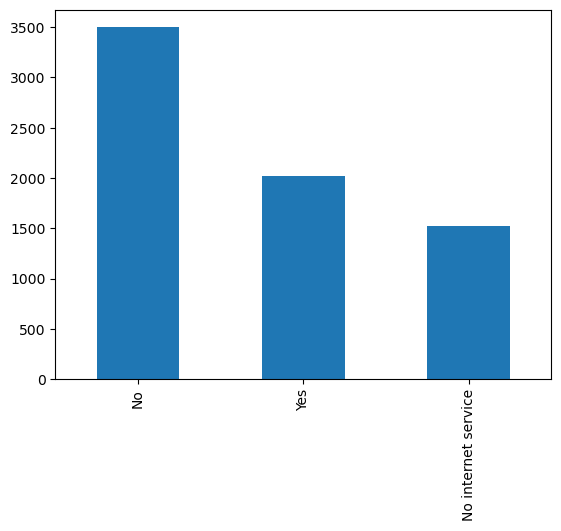

In [52]:
# Plotting the distribution of values
df['OnlineSecurity'].value_counts().plot.bar()

When one-hot encoding, we may consider recording both 'No' and 'No internet service' as 0.

##### `OnlineBackup`

In [53]:
# Sample of column entries
df['OnlineBackup'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: OnlineBackup, dtype: object

Our guess is that this will be similar to `OnlineSecurity` as it appears to pertain to a service offered to customers with internet access. Checking `value_counts` confirms this:

In [54]:
# Distribution of values
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:>

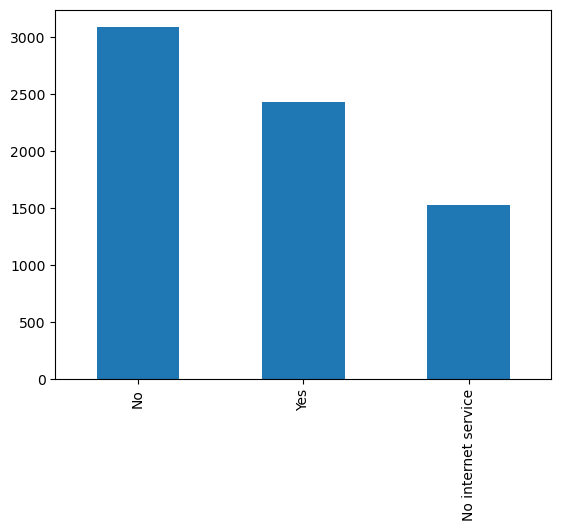

In [55]:
# Plotting the distribution of values
df['OnlineBackup'].value_counts().plot.bar()

##### `DeviceProtection`

In [56]:
# Sample of column entries
df['DeviceProtection'].head()

0     No
1    Yes
2     No
3    Yes
4     No
Name: DeviceProtection, dtype: object

Let's look at the unique values:

In [57]:
# Distribution of values
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [58]:
# Distribution of values as percentage of all entries
df['DeviceProtection'].value_counts() / len(df) * 100

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64

<AxesSubplot:>

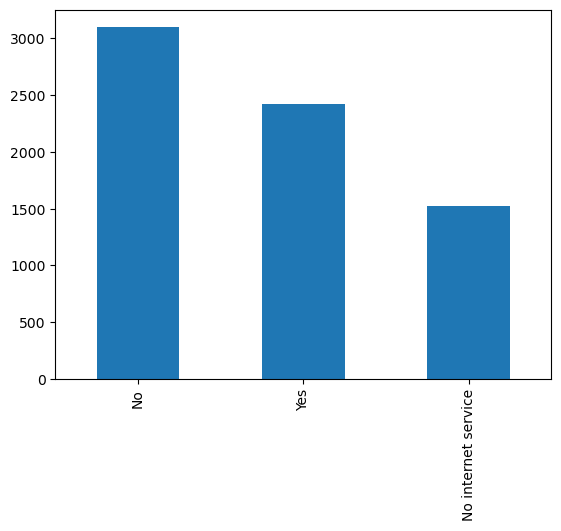

In [59]:
# Plotting the distribution of values
df['DeviceProtection'].value_counts().plot.bar()

##### `TechSupport`

In [60]:
# Sample of column entries
df['TechSupport'].head()

0     No
1     No
2     No
3    Yes
4     No
Name: TechSupport, dtype: object

This appears to be another Yes/No column, presumably for customers with internet service. Let's look at unique values and distribution:

In [61]:
# Distribution of values
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [62]:
# Distribution of values as percentage of all entries
df['TechSupport'].value_counts() / len(df) * 100

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64

<AxesSubplot:>

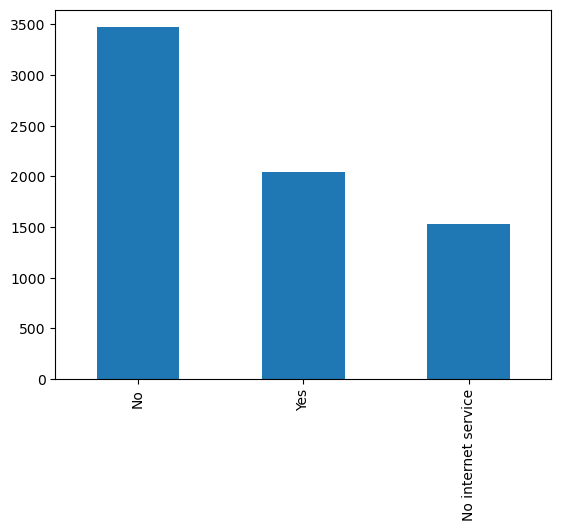

In [63]:
# Plotting the distribution of values
df['TechSupport'].value_counts().plot.bar()

Almost half of the customers have internet service but are not signed up for `TechSupport`, and around 71% of customers in total do not use it.

##### `StreamingTV`

In [64]:
# Sample of column entries
df['StreamingTV'].head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingTV, dtype: object

This appears to be another Yes/No string column, presumably for customers who have a TV streaming package with their internet plan, and we can check the unique values and distribution:

In [65]:
# Distribution of values
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [66]:
# Distribution of values as percentage of all entries
df['StreamingTV'].value_counts() / len(df) * 100

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64

<AxesSubplot:>

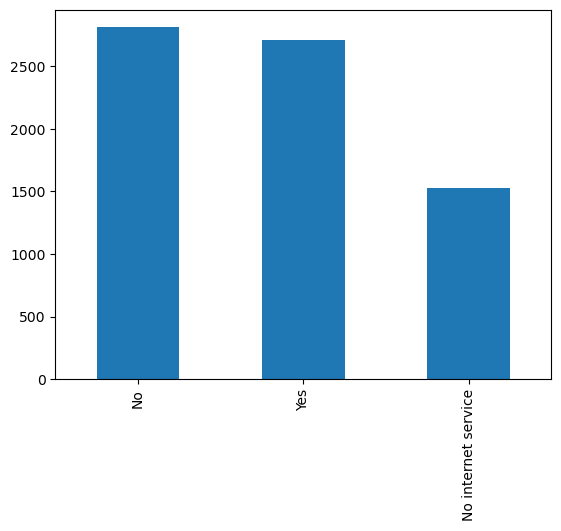

In [67]:
# Plotting the distribution of values
df['StreamingTV'].value_counts().plot.bar()

##### `StreamingMovies`

In [68]:
# Sample of column entries
df['StreamingMovies'].head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

This appears to be another Yes/No string column, presumably referring to customers who sign up for a movie streaming service addon with their internet plan, and we can check the unique values:

In [69]:
# Distribution of values
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [70]:
# Distribution of values as percentage of all entries
df['StreamingMovies'].value_counts() / len(df) * 100

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64

<AxesSubplot:>

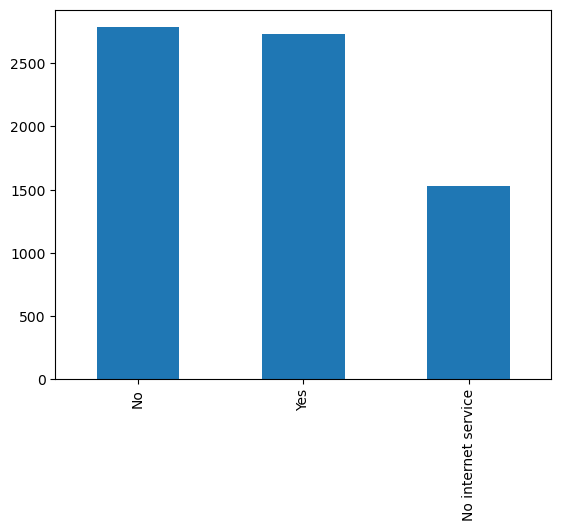

In [71]:
# Plotting the distribution of values
df['StreamingMovies'].value_counts().plot.bar()

##### `Contract`

In [72]:
# Sample of column entries
df['Contract'].head()

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object

This appears to be a string column with different options. Let's confirm that all items are strings:

In [73]:
typecheck(df['Contract'], 'str')

7043 items are type str, out of 7043


Let's use `value_counts` to learn about unique values and their distribution in the dataset.

In [74]:
# Distribution of values
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

These appear to be contract types.

<AxesSubplot:>

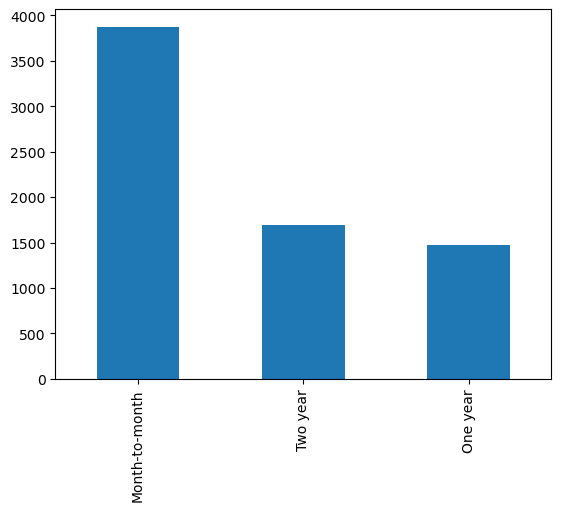

In [75]:
# Plotting the distribution of values
df['Contract'].value_counts().plot.bar()

Most customers are on monthly contracts.

##### `PaperlessBilling`

In [76]:
# Sample of column entries
df['PaperlessBilling'].head()

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: PaperlessBilling, dtype: object

This appears to be a Yes/No column. Let's check if all items are strings:

In [77]:
typecheck(df['PaperlessBilling'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and distribution:

In [78]:
# Distribution of values
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [79]:
# Distribution of values as percentage of all entries
df['PaperlessBilling'].value_counts() / len(df) * 100

Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64

<AxesSubplot:>

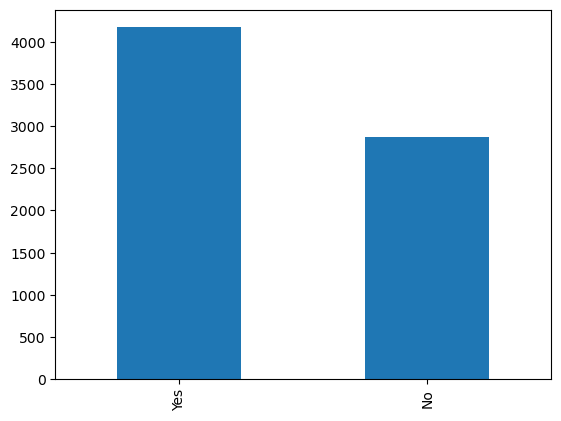

In [80]:
# Plotting the distribution of values
df['PaperlessBilling'].value_counts().plot.bar()

It appears that almost 3/5 of customers use paperless billing.

##### `PaymentMethod`

In [81]:
# Sample of column entries
df['PaymentMethod'].head()

0             Electronic check
1                 Mailed check
2                 Mailed check
3    Bank transfer (automatic)
4             Electronic check
Name: PaymentMethod, dtype: object

This appears to be a string column with multiple options for different payment modes used by customers. Let's check what the item dtypes are:

In [82]:
typecheck(df['PaymentMethod'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and the distribution of this series:

In [83]:
# Distribution of values
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [84]:
# Distribution of values as percentage of all entries
df['PaymentMethod'].value_counts() / len(df) * 100

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

<AxesSubplot:>

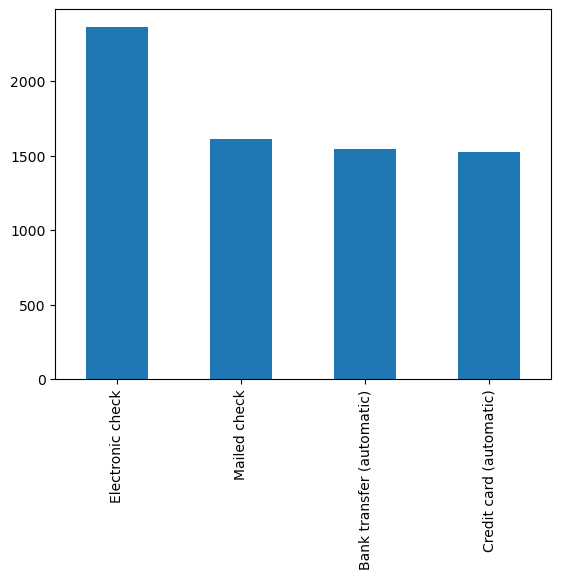

In [85]:
# Plotting the distribution of values
df['PaymentMethod'].value_counts().plot.bar()

Electronic check appears to be the most popu.ar, with other payment types being mostly evenly divided.

##### `MonthlyCharges`

In [86]:
# Sample of column entries
df['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

This is our second numeric column, this time with a dtype of `float64`. This probably refers to how much customers are charged each month, with the unit presumably being dollars. We know from earlier that there are no null values in this column, so let's look at descriptive statistics:

In [87]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Let's see the distribution of values across the dataset.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

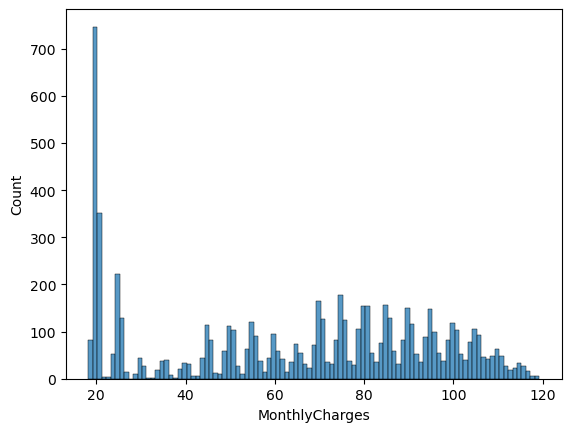

In [88]:
sns.histplot(data=(df['MonthlyCharges']), binwidth=1)

There appear to be multiple peaks in this histogram, which suggests that there are set plan prices with slight variations around each peak possibly attributable to discounts, administrative fees, or additional services. Let's calculate **skewness**.

In [89]:
df['MonthlyCharges'].skew()

-0.22052443394398033

The distribution is negatively skewed, meaning that there is more weight towards the higher end of the distribution. If we eliminate the large number of customer who have monthly charges not more than 25 (without this segment the distribution looks more bell-shaped), this value is even more negative:

In [90]:
df[df['MonthlyCharges'] > 25]['MonthlyCharges'].skew()

-0.38795401881097447

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [91]:
scipy.stats.kurtosis(df['MonthlyCharges'])

-1.2572191009381857

Kurtosis is negative, indicating that the distribution is relatively flat.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5182812b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff518281850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff538769fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff518281df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff51828d100>],
 'means': []}

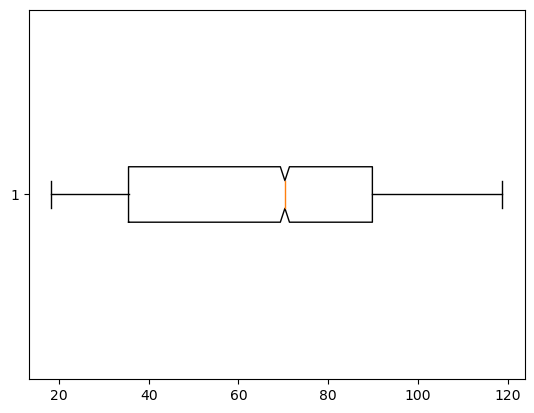

In [92]:
matplotlib.pyplot.boxplot(df['MonthlyCharges'], notch='True', vert=0)

There do not appear to be extreme outliers in this variable.

##### `TotalCharges`

In [93]:
# Sample of column entries
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

This appears to also be about how much the customer is charged, and probably means how much the customer has been charged across the lifetime of their tenure. Let's look at descriptive statistics:

In [94]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

This is interesting; `describe` yields a different descriptive statistics format than `MonthlyCharges`, suggesting that this column when read as a series is not in a numeric datatype. Indeed, the column's dtype is `object`. Before we run `typecheck`, let's check the dtype of the first item:

In [95]:
type(df['TotalCharges'].values.item(0))

str

This item has a `str` type for some reason. Let's see if this is the case for other items:

In [96]:
typecheck(df['TotalCharges'], 'str')

7043 items are type str, out of 7043


Judging from the print output when read in a text editor, it appears that some items were in dtype `int`.

In [97]:
typecheck(df['TotalCharges'], 'float', error_msg=False)
typecheck(df['TotalCharges'], 'int', error_msg=False)
typecheck(df['TotalCharges'], 'str', error_msg=False)

0 items are type float, out of 7043
0 items are type int, out of 7043
7043 items are type str, out of 7043


Let's start doing data cleaning. As a best practice, let's perform data cleaning operations on a separate dataframe:

In [98]:
# Making a 'cleaned data' dataframe
data = df

# Turning all values on TotalCharges to float
data['TotalCharges'] = pd.to_numeric(df.drop(index = df[df['TotalCharges']==' '].index, axis=0)['TotalCharges'])
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Let's look at descriptive statistics for this new series:

In [99]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Let's see the distribution of values across the dataset.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

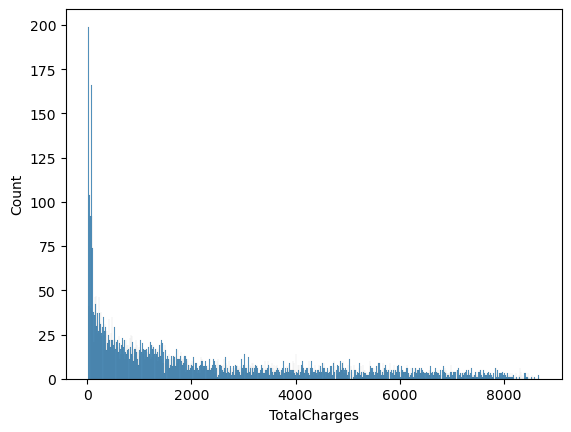

In [100]:
sns.histplot(data=data['TotalCharges'], binwidth=10)

There appears to be a very sharp left tail, suggeting that a large proportion of customers have a relatively low `TotalCharges` value. The tail is much longer at the left end. Let's calculate **skewness.**

In [101]:
df['TotalCharges'].skew()

0.961642499724251

The distribution is positively skewed, or skewed to the right.

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [102]:
scipy.stats.kurtosis(df['TotalCharges'])

nan

The kurtosis is negative.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff54c6508b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff54c650e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff54c6505e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff54c661430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff54c661700>],
 'means': []}

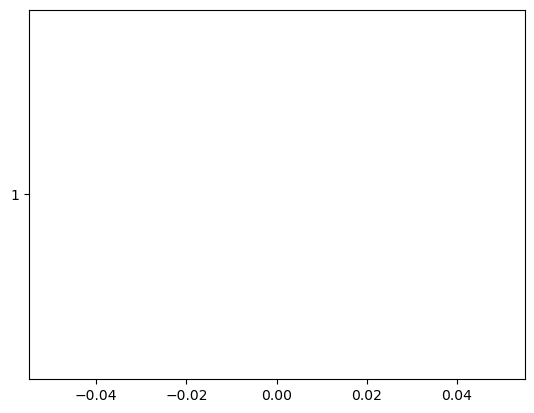

In [103]:
matplotlib.pyplot.boxplot(df['TotalCharges'], notch='True', vert=0)

It appears that the last quartile has a much wider range than the others, but there are no extreme outliers.

##### `churn`

In [104]:
# Sample of column entries
df['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

This appears to be our **target variable**: the one we will attempt to model later on. We are interested in how other variables affect churn, as it could inform customer retention programme design or create insights about issues in how the telco operates. This appears to be a Yes/No column. Let's confirm all items are the same type:

In [105]:
typecheck(df['Churn'], 'str')

7043 items are type str, out of 7043


Let's look at the distribution of entries:

In [106]:
# Distribution of entries
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [107]:
# Distribution of values as percentage of all entries
df['Churn'].value_counts() / len(df) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<AxesSubplot:>

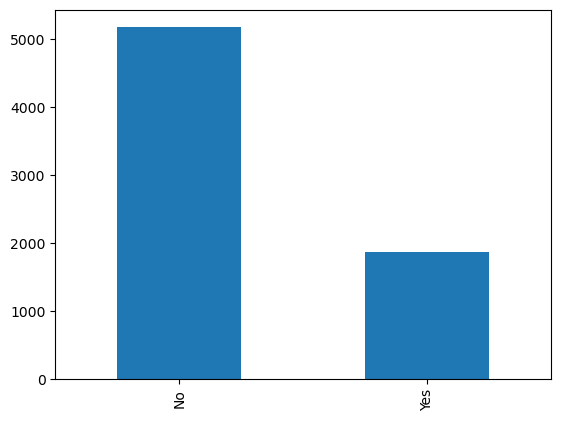

In [108]:
# Plotting the distribution of values
df['Churn'].value_counts().plot.bar()

#### Bivariate analysis

To enable some of our bivariate analysis, let's make a one-hot encoded version of our dataset:

In [109]:
"""
This line of code:
1) drops customerID from the dataframe data, so that it will not be one-hot encoded;
2) uses pd.get_dummies to one-hot encode the remaining variables;
3) joins the resulting dataframe with a dataframe consisting only of customerID, so that the resulting dataframe
   has the customer ID, the one-hot encoded categorical information, and numerical variables.
"""

# Data cleaning to enable one-hot encoding
data = data.replace({'Yes' : 1, 'No' : 0, 'No phone service' : 0, 'No internet service' : 0, 'Female' : 0, 'Male' : 1})
data['InternetService'] = df['InternetService'] # 'No' values in this column need to be intact for a one-hot encoder to work.

# One-hot encoding
data_onehot = pd.DataFrame(data[('customerID')]).join(pd.get_dummies(data.drop(columns=('customerID'))))
data_onehot

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


Let's look at the columns in this dataframe:

In [110]:
data_onehot.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

##### Correlation matix

In [111]:
data_onehot.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,0.321269,-0.030696,-0.333403,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.157884,0.165651,-0.381593,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.146291,0.176049,-0.380754,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373


Here is a heatmap of this correlation matrix:

<AxesSubplot:>

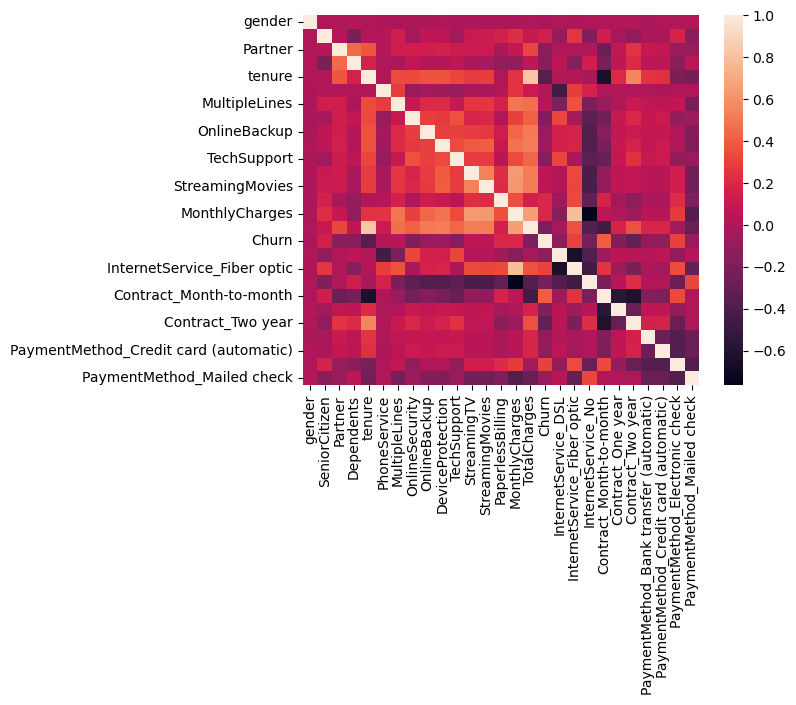

In [112]:
sns.heatmap(data_onehot.corr())

Here are the other variables in relation to `churn`:

In [113]:
data_onehot.corr()['Churn']

gender                                    -0.008612
SeniorCitizen                              0.150889
Partner                                   -0.150448
Dependents                                -0.164221
tenure                                    -0.352229
PhoneService                               0.011942
MultipleLines                              0.040102
OnlineSecurity                            -0.171226
OnlineBackup                              -0.082255
DeviceProtection                          -0.066160
TechSupport                               -0.164674
StreamingTV                                0.063228
StreamingMovies                            0.061382
PaperlessBilling                           0.191825
MonthlyCharges                             0.193356
TotalCharges                              -0.199484
Churn                                      1.000000
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetServ

From first glance, especially correlated pairs include:

<ul>
    <li>`tenure` and `TotalCharges`, which are expected to be dependent as (obviously) people who have subscribed for longer will tend to have paid more over time</li>
    <li>`StreamingTV` and `StreamingMovies` with each other and `MonthlyCharges`, which makes sense as these services are likely to require add-on charge</li>
    <li>`InternetService_Fiber optic` and `MonthlyCharges`, which makes sense</li>
    <li>`ContractType_Two year` and `tenure`, which is clearly dependent</li>
</ul>

A number of variables seem to be more correlated with `churn` than others, *relatively speaking*:

**Positive correlation**
<ul>
    <li>`ContractType_Month-to-Month`</li>
    <li>`PaymentMethod_Electronic check`</li>
    <li>`InternetService_Fiber optic`</li>
</ul>

**Negative correlation**
<ul>
    <li>`tenure`</li>
    <li>`ContractType_Two year`</li>
    <li>`InternetService_No`</li>
</ul>

##### Numeric-to-numeric

Let's look again at the correlations between the numeric variables:

In [114]:
data_onehot[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


Let's look at scatterplots visualising the relationships between the numeric variables.

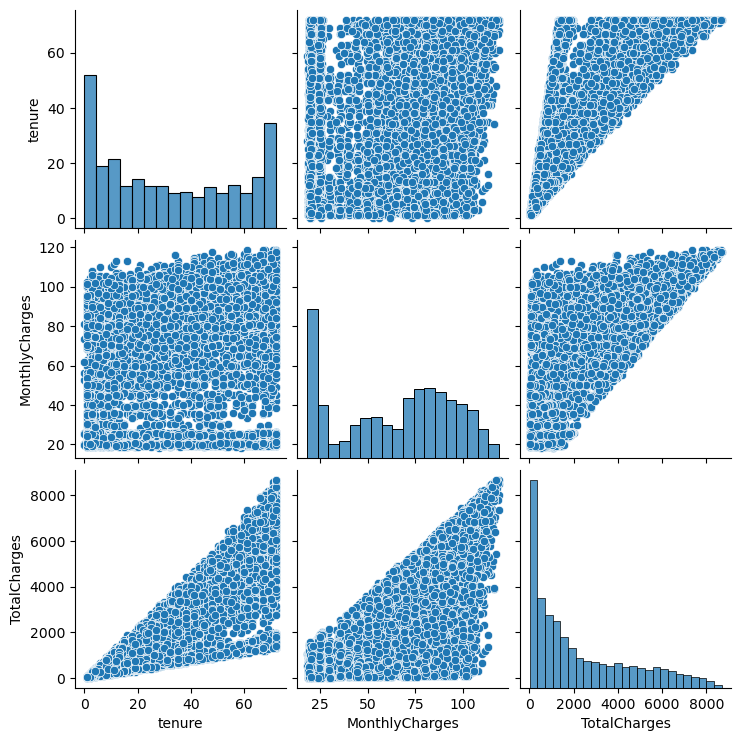

In [115]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

`tenure` and `TotalCharges` appear to be most related, although there is some visible heteroscedasticity. `tenure` and `MonthlyCharges` appear to be most weakly related.

##### Numeric-categorical analysis

Let's look at our numerical variables in relation to churn:

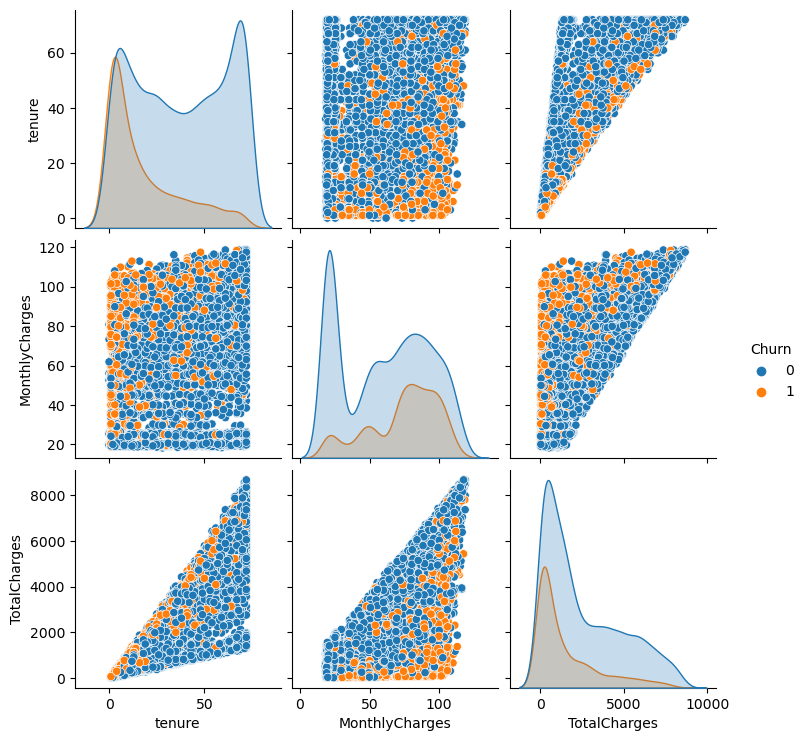

In [116]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

Let's look at them in relation to gender:

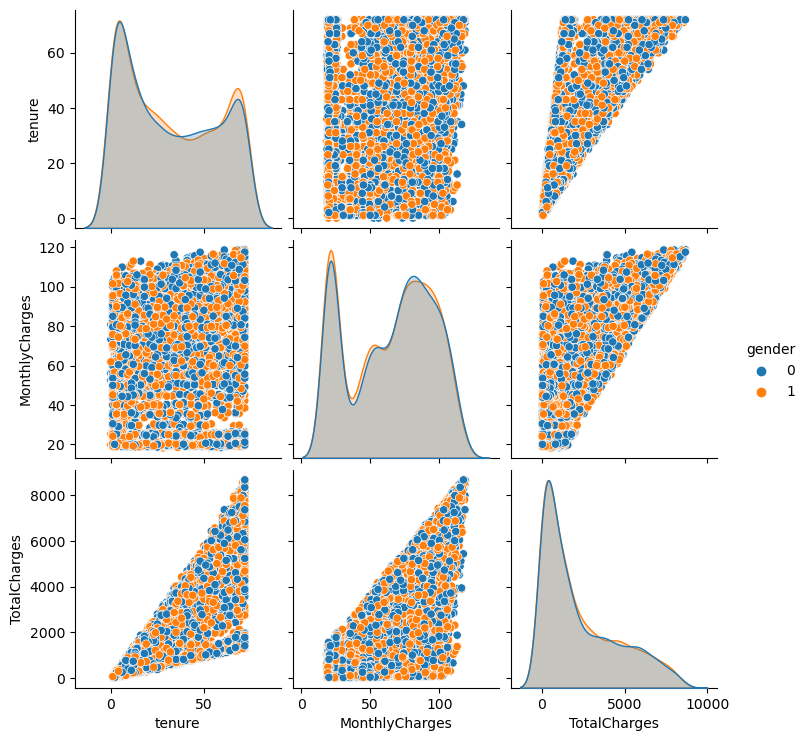

In [117]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'gender']], hue='gender')

Numeric variables did not seem to impact churn significantly.

Of course, `Churn` and `tenure` appear to have an inverse relationship.

##### Categorical-categorical analysis

Let's look at the relationships between categories:

Text(0.5, 1.0, 'Churn and Payment Mode')

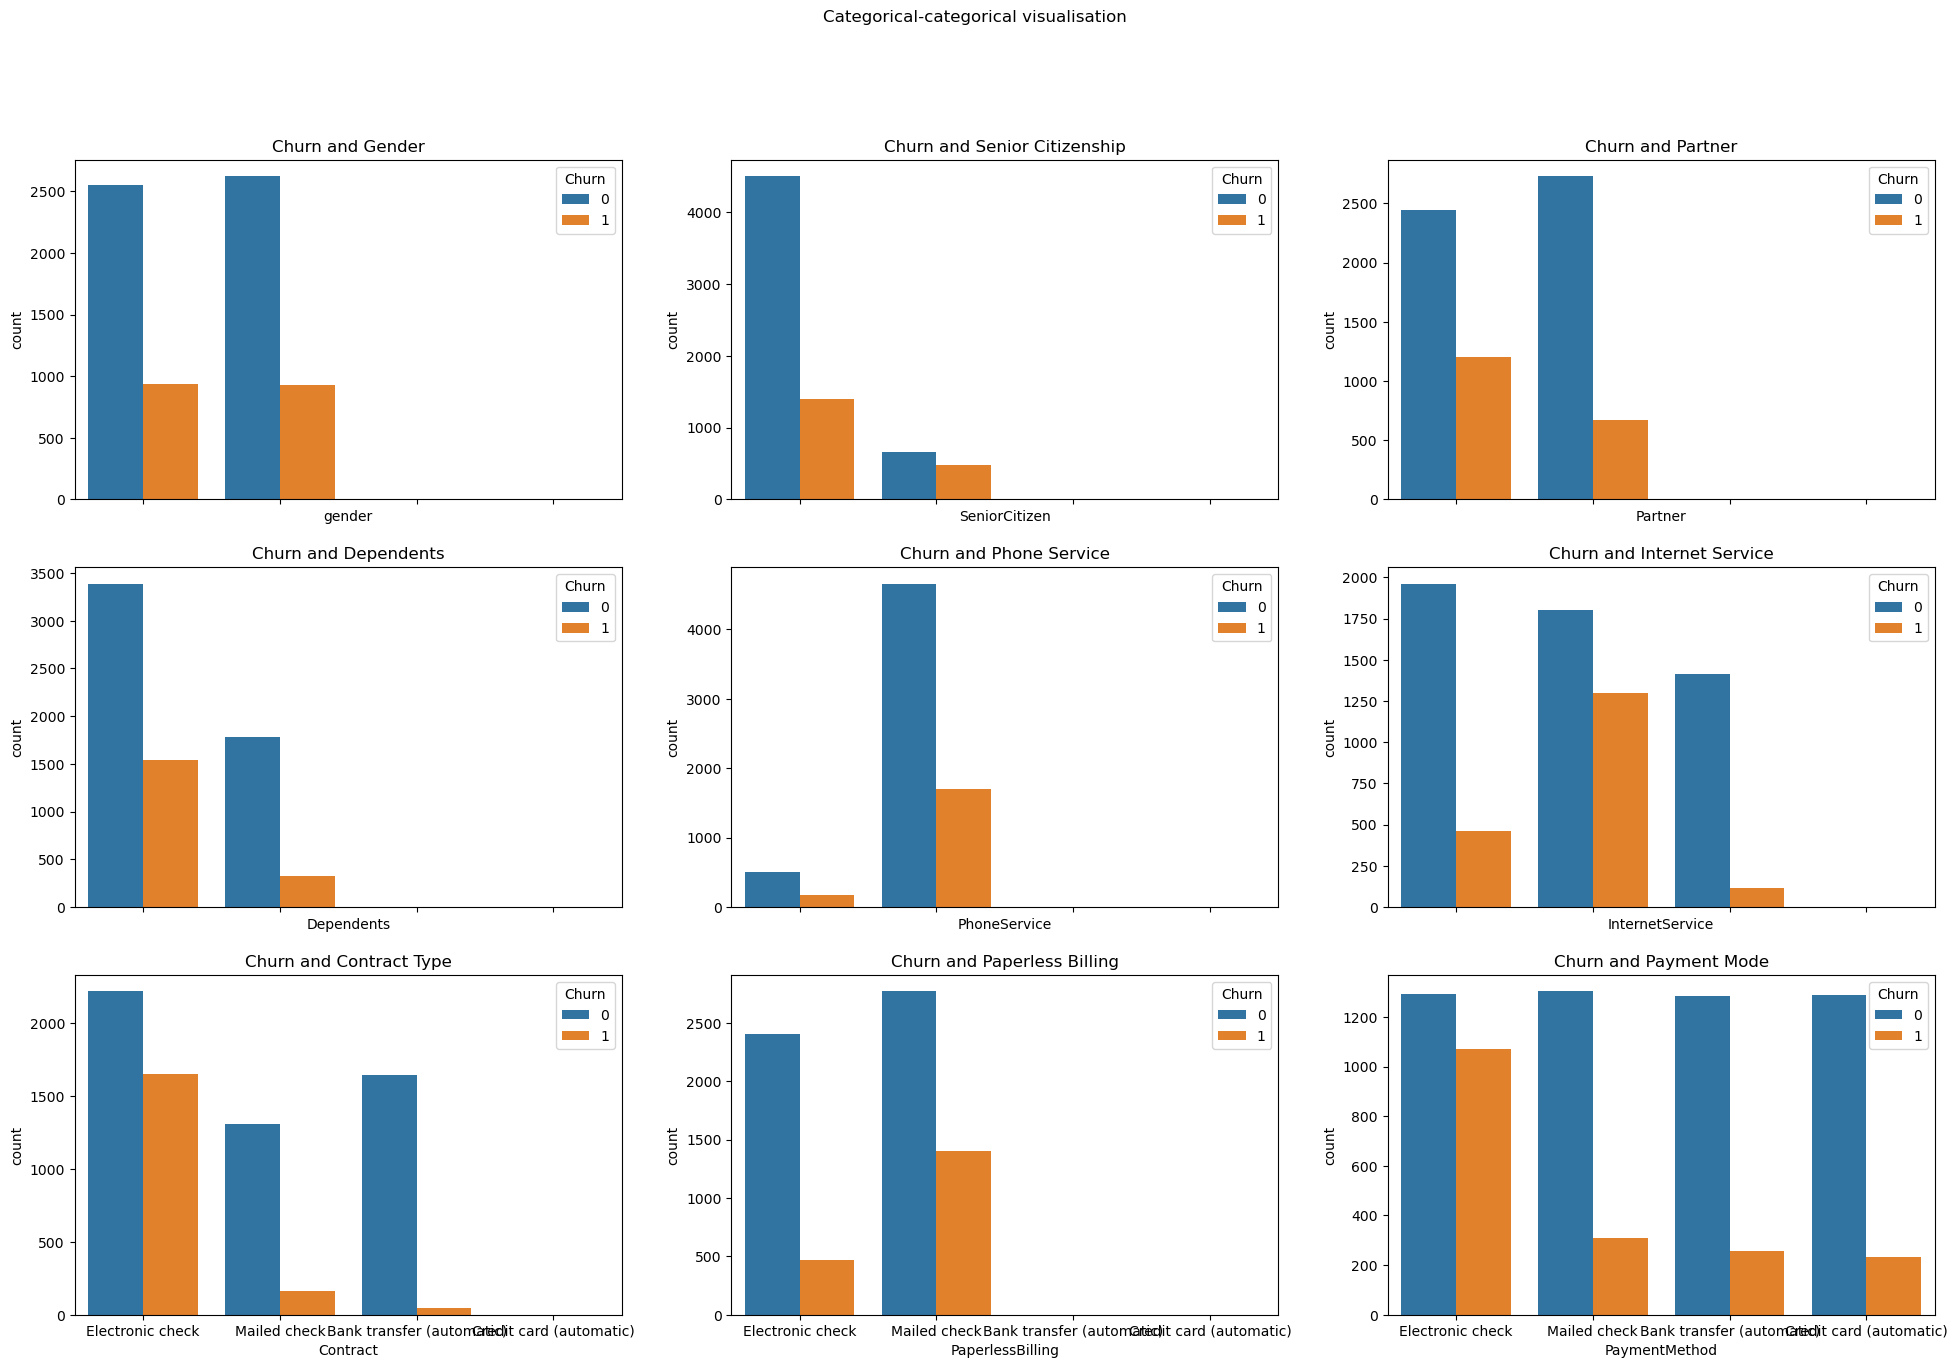

In [118]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(24,15))
fig.suptitle('Categorical-categorical visualisation')

sns.countplot(ax=axes[0,0], data=data, x='gender', hue='Churn')
axes[0,0].set_title('Churn and Gender')

sns.countplot(ax=axes[0,1], data=data, x='SeniorCitizen', hue='Churn')
axes[0,1].set_title('Churn and Senior Citizenship')

sns.countplot(ax=axes[0,2], data=data, x='Partner', hue='Churn')
axes[0,2].set_title('Churn and Partner')

sns.countplot(ax=axes[1,0], data=data, x='Dependents', hue='Churn')
axes[1,0].set_title('Churn and Dependents')

sns.countplot(ax=axes[1,1], data=data, x='PhoneService', hue='Churn')
axes[1,1].set_title('Churn and Phone Service')

sns.countplot(ax=axes[1,2], data=data, x='InternetService', hue='Churn')
axes[1,2].set_title('Churn and Internet Service')

sns.countplot(ax=axes[2,0], data=data, x='Contract', hue='Churn')
axes[2,0].set_title('Churn and Contract Type')

sns.countplot(ax=axes[2,1], data=data, x='PaperlessBilling', hue='Churn')
axes[2,1].set_title('Churn and Paperless Billing')

sns.countplot(ax=axes[2,2], data=data, x='PaymentMethod', hue='Churn')
axes[2,2].set_title('Churn and Payment Mode')

We can see that:

<ul>
    <li>Customers with month-to-month contracts, electronic check as their payment mode, and fiber optic internet connections appear significantly more likely to churn than not.</li>
    <li>Gender, senior citizenship, and family configuration did not seem to affect churn as much.</li>
</ul>

#### Data cleaning

We earlier performed some data cleaning operations in both Univariate and Bivariate data analysis categories in order to enable us to generate some visualisations and calculations. This section contains the earlier work done so that all data cleaning operations can be documented in this section.

Some data cleaning peculiarities found in the dataset used for the previous EDA assignment, such as missing values in `TotalCharges` and non-binary options in `Gender`, were not found in this version of the dataset.

In [119]:
# data loading
df = pd.read_csv('Telco-Customer-Churn.csv')

# making a new dataframe for cleaned data
data = df.copy()

# standardising the item type for TotalCharges
data['TotalCharges'] = pd.to_numeric(data.drop(index = data[data['TotalCharges'] == ' '].index, axis=0)['TotalCharges'])
data['TotalCharges'] = data['TotalCharges'].fillna(0)

# making categorical data consistent
data = data.replace({'Yes' : 1, 'No' : 0, 'No phone service' : 0, 'No internet service' : 0, 'Female' : 0, 'Male' : 1})
data['InternetService'] = df['InternetService'] # 'No' values in this column need to be intact for a one-hot encoder to work.

# creating a one-hot encoded version
data_onehot = pd.get_dummies(data.drop(columns=('customerID')))

In [120]:
data_onehot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


#### Standardisation

For our later data visualisations, and for the purposes of model-building or other activities that may be sensitive to Euclidean distance, let's proceed to make versions of `data` and `data_ohe` with values standardised.

In [121]:
# Using sklearn StandardScaler
from sklearn import preprocessing
scale = sklearn.preprocessing.StandardScaler()

# Standardising data_sd using the onehotencoded data
data_sd = data_onehot.copy()

# Checking whether customer is new or not (< 6 months)
data_sd['tenure'] = scale.fit_transform(data[['tenure']])
data_sd['MonthlyCharges'] = scale.fit_transform(data[['MonthlyCharges']])
data_sd['TotalCharges'] = scale.fit_transform(data[['TotalCharges']])

In [122]:
data_sd.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236724,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.236724,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Right now, the following dataframes are available for use:

`df` - original dataset <br>
`data` - cleaned dataset <br>
`data_onehot` - cleaned dataset, one-hot encoded <br>
`data_sd` - standardised dataset, one-hot encoded

### Feature Engineering and Analysis
Think about any possible feature that is predictive of the target.  
Measure how each feature is predictive of the target and select all those relevant for the model.

In [123]:
# Dealing with imbalance - oversampling

data_sd.dropna(inplace = True)
x_train, x_test, y_train, y_test = train_test_split(data_sd.drop('Churn', axis = 1), data_sd['Churn'], test_size=0.2, random_state=0)

# Combine the input features and output labels for the training and test sets
x_train['Churn'] = y_train
x_test['Churn'] = y_test
test_df = x_test

# Separate churn and no churn data
churn_data = x_train[x_train['Churn'] == 1]
nochurn_data = x_train[x_train['Churn'] == 0]

# Oversample churn data using simple random oversampling
churn_oversampled = resample(churn_data,
                             replace=True,  # Sample with replacement
                             n_samples=len(nochurn_data), # No of nochurn train data
                             random_state=1) 


# Combine churn oversampled data with original no churn data
train_df = pd.concat([churn_oversampled, nochurn_data])

#### Choosing from current features

Mutual information measures the mutual dependency amongst two variables based on entropy estimations. In our case, we are interested in evaluating the degree of dependency between the independent variables with the outcome variable churn. A higher value for mutual information tell us that there is a high degree of dependency, implying that the predictor useful for predicting the outcome.

In [124]:
# function that computes the mutual infomation score
# between a categorical variable and churn outcome
def compute_mutual_information(cat):
    return mutual_info_score(cat, train_df.Churn)

# select categorial variables excluding the response variable
categorical_variables = train_df.drop(['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending = True)

# visualize mutual information
print(feature_importance)

gender                                     0.000067
PhoneService                               0.000337
MultipleLines                              0.001874
StreamingMovies                            0.001900
StreamingTV                                0.002699
DeviceProtection                           0.003013
PaymentMethod_Mailed check                 0.003939
OnlineBackup                               0.008335
PaymentMethod_Bank transfer (automatic)    0.011116
InternetService_DSL                        0.012094
Partner                                    0.013880
SeniorCitizen                              0.014751
PaymentMethod_Credit card (automatic)      0.017640
Dependents                                 0.020802
OnlineSecurity                             0.021639
TechSupport                                0.022647
PaperlessBilling                           0.025756
Contract_One year                          0.027877
InternetService_No                         0.037352
PaymentMetho

The benefit we get with using mutual information over something like a correlation matrix is that mutual information extends the notion of correlation to nonlinear information as well. So, we can detect both linear and nonlinear relationships as well between the predictors and the outcome variable.

Noting that most categorical features provides high mutual information, we will do some feature engineering on the features that has a overall score > 0.002.

#### Feature Engineering

In [125]:
# Counting total number of relevant services 
train_df['TotalServices'] = train_df['OnlineSecurity'] + train_df['OnlineBackup'] + train_df['DeviceProtection'] + train_df['TechSupport'] + train_df['StreamingTV'] + train_df['StreamingMovies']
test_df['TotalServices'] = test_df['OnlineSecurity'] + test_df['OnlineBackup'] + test_df['DeviceProtection'] + test_df['TechSupport'] + test_df['StreamingTV'] + test_df['StreamingMovies']

# Checking whether customer is new or not (< 6 months)
train_df['NewCustomer'] = train_df['tenure'].apply(lambda x: 1 if x < 6 else 0)
test_df['NewCustomer'] = test_df['tenure'].apply(lambda x: 1 if x < 6 else 0)

# Estimate of the number of pax living in the household
train_df['LivingAlone'] = train_df['Partner'] + train_df['Dependents']
test_df['LivingAlone'] = test_df['Partner'] + test_df['Dependents']

Hence, the finalised features that we will be using are:

Categorical Features

1. TotalServices
2. NewCustomer
3. LivingAlone
4. Contract
5. PaperlessBilling
6. PaymentMethod
7. SeniorCitizen

Continuous Features:

1. Monthly Charges
2. Total Charges 
3. Tenure


In [126]:
cols_to_keep = ['MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year',
                'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
               'PaymentMethod_Credit card (automatic)', 'PaperlessBilling',
               'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
               'TotalServices', 'NewCustomer', 'LivingAlone', 'Churn', 'tenure', 'SeniorCitizen']

# New over-sampled dataset
sel_train_df = train_df[cols_to_keep]
sel_test_df = test_df[cols_to_keep]

# New original dataset
# Counting total number of relevant services 
data_sd['TotalServices'] = data_sd['OnlineSecurity'] + data_sd['OnlineBackup'] + data_sd['DeviceProtection'] + data_sd['TechSupport'] + data_sd['StreamingTV'] + data_sd['StreamingMovies']
data_sd['NewCustomer'] = data_sd['tenure'].apply(lambda x: 1 if x < 6 else 0)
data_sd['LivingAlone'] = data_sd['Partner'] + data_sd['Dependents']

sel_original = data_sd[cols_to_keep]

The continuous features were chosen as they have a high correlation with Churn. However, although we note that there might be multicollinearity, we would want to account for the difference in customer's profile. For instance, someone who just joined and have monthly charge of 20 bucks is a different customer than someone who has been with the service for like 10 years. 

### Configure the model using an appropriate classification technique

In [127]:
# Now we compare how models trained on all features vs on selected
# features performs predictions - using the original nonsampled data

ori_x = data_sd.drop(['Churn', 'TotalServices', 'NewCustomer', 'LivingAlone'], axis = 1)
ori_y = data_sd['Churn']

sel_x = sel_original.drop('Churn', axis = 1)
sel_y = sel_original['Churn']

print("Training on all features:\n")

x_train, x_test, y_train, y_test = train_test_split(ori_x, ori_y, test_size=0.2, random_state=0)
lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

print("Training on selected features:\n")

x_train, x_test, y_train, y_test = train_test_split(sel_x, sel_y, test_size=0.2, random_state=0)
lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

Training on all features:

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Training on selected features:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.62      0.50      0.56       368

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [128]:
# Now we compare how models trained on all features vs on selected features performs predictions - using the oversampled data

print("Training on all features:\n")

x_train = train_df.drop(['Churn', 'TotalServices', 'NewCustomer', 'LivingAlone'], axis = 1)
y_train = train_df['Churn']
x_test = test_df.drop(['Churn', 'TotalServices', 'NewCustomer', 'LivingAlone'], axis = 1)
y_test = test_df['Churn']

lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

print("Training on selected features:\n")

sel_x_train = sel_train_df.drop(['Churn', 'TotalServices', 'NewCustomer', 'LivingAlone'], axis = 1)
sel_y_train = sel_train_df['Churn']
sel_x_test = sel_test_df.drop(['Churn', 'TotalServices', 'NewCustomer', 'LivingAlone'], axis = 1)
sel_y_test = sel_test_df['Churn']

lr = LogisticRegression(solver = 'liblinear')
lr.fit(sel_x_train, sel_y_train)
sel_y_pred = lr.predict(sel_x_test)
print(classification_report(sel_y_test, sel_y_pred))

Training on all features:

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1041
           1       0.50      0.79      0.61       368

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Training on selected features:

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1041
           1       0.48      0.77      0.59       368

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409



So in both cases, training on the oversampled dataset made a substantial difference in recall. Interestingly, the model trained using just selected featured performed slightly worse in the unsampled data, but slightly better when ran with the sampled dataset

### Metric for assessment of the model

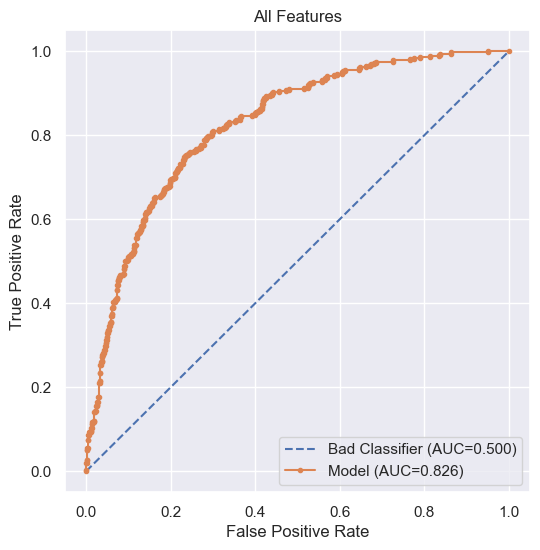

In [129]:
# Calculating ROC for model trained on all features (oversampled) 

lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train, y_train)

# Probabilities for positive outcomes
lr_probs = lr.predict_proba(x_test)[:, 1]

# 50-50 Chance (Bad Classifier)
bc_probs = [0 for _ in range(len(y_test))]

# Calculate AUC Scores and ROC Curves
bc_auc = roc_auc_score(y_test, bc_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

bc_fpr, bc_tpr, bc_thresh = roc_curve(y_test, bc_probs)
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, lr_probs)

# Plot

sns.set(rc={'figure.figsize':(6,6)})

# plot the roc curve for the model
plt.plot(bc_fpr, bc_tpr, linestyle='--', label='Bad Classifier (AUC=%.3f)' % (bc_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model (AUC=%.3f)' % (lr_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Features')
plt.legend()
plt.show()

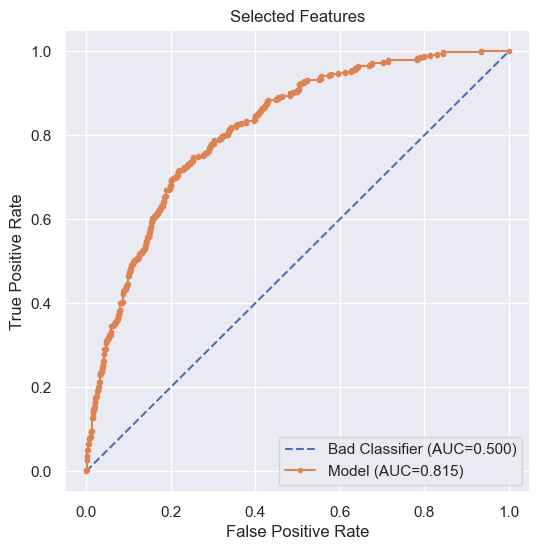

In [130]:
# Calculating ROC for model trained on selected features (oversampled) 

lr = LogisticRegression(solver = 'liblinear')
lr.fit(sel_x_train, sel_y_train)

# Probabilities for positive outcomes
lr_probs = lr.predict_proba(sel_x_test)[:, 1]

# 50-50 Chance (Bad Classifier)
bc_probs = [0 for _ in range(len(sel_y_test))]

# Calculate AUC Scores and ROC Curves
bc_auc = roc_auc_score(sel_y_test, bc_probs)
lr_auc = roc_auc_score(sel_y_test, lr_probs)

bc_fpr, bc_tpr, bc_thresh = roc_curve(sel_y_test, bc_probs)
lr_fpr, lr_tpr, lr_thresh = roc_curve(sel_y_test, lr_probs)

# Plot

sns.set(rc={'figure.figsize':(6,6)})

# plot the roc curve for the model
plt.plot(bc_fpr, bc_tpr, linestyle='--', label='Bad Classifier (AUC=%.3f)' % (bc_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model (AUC=%.3f)' % (lr_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Selected Features')
plt.legend()
plt.show()

### Extra - Decision Trees, Bagging and ADABoost

In [131]:
from sklearn import tree
from sklearn import ensemble

We use the selected features for the purpose of this model

In [132]:
x_train, x_test, y_train, y_test = train_test_split(sel_x, sel_y, test_size=0.2, random_state=0)

clf = tree.DecisionTreeClassifier()
clf2 = tree.DecisionTreeClassifier(max_depth= 3)
clf3 = tree.DecisionTreeClassifier(max_depth= 5, max_leaf_nodes= 9)
clf4 = tree.DecisionTreeClassifier(max_depth= 1)
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [133]:
bg = ensemble.BaggingClassifier(estimator= clf3, n_estimators= 100, random_state= 0)
bg2 = ensemble.BaggingClassifier(estimator= clf4, n_estimators= 100, random_state= 0)
bg.fit(x_train, y_train)
bg2.fit(x_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'estimator'

In [ ]:
ad = ensemble.AdaBoostClassifier(estimator= clf4, n_estimators= 100, learning_rate= 0.5)
ad2 = ensemble.AdaBoostClassifier(estimator= clf4, n_estimators= 100, learning_rate= 1)
ad3 = ensemble.AdaBoostClassifier(estimator= clf4, n_estimators= 100, learning_rate= 2)
ad4 = ensemble.AdaBoostClassifier(estimator= clf4, n_estimators= 100, learning_rate= 5)
ad5 = ensemble.AdaBoostClassifier(estimator= clf4, n_estimators= 100, learning_rate= 0.1)
ad.fit(x_train, y_train)
ad2.fit(x_train, y_train)
ad3.fit(x_train, y_train)
ad4.fit(x_train, y_train)
ad5.fit(x_train, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(x_test)))

In [ ]:
plt.figure(figsize=[10,12])
tree.plot_tree(clf, max_depth= 2, filled = True, fontsize = 9, feature_names=sel_original.drop('Churn', axis = 1).columns)